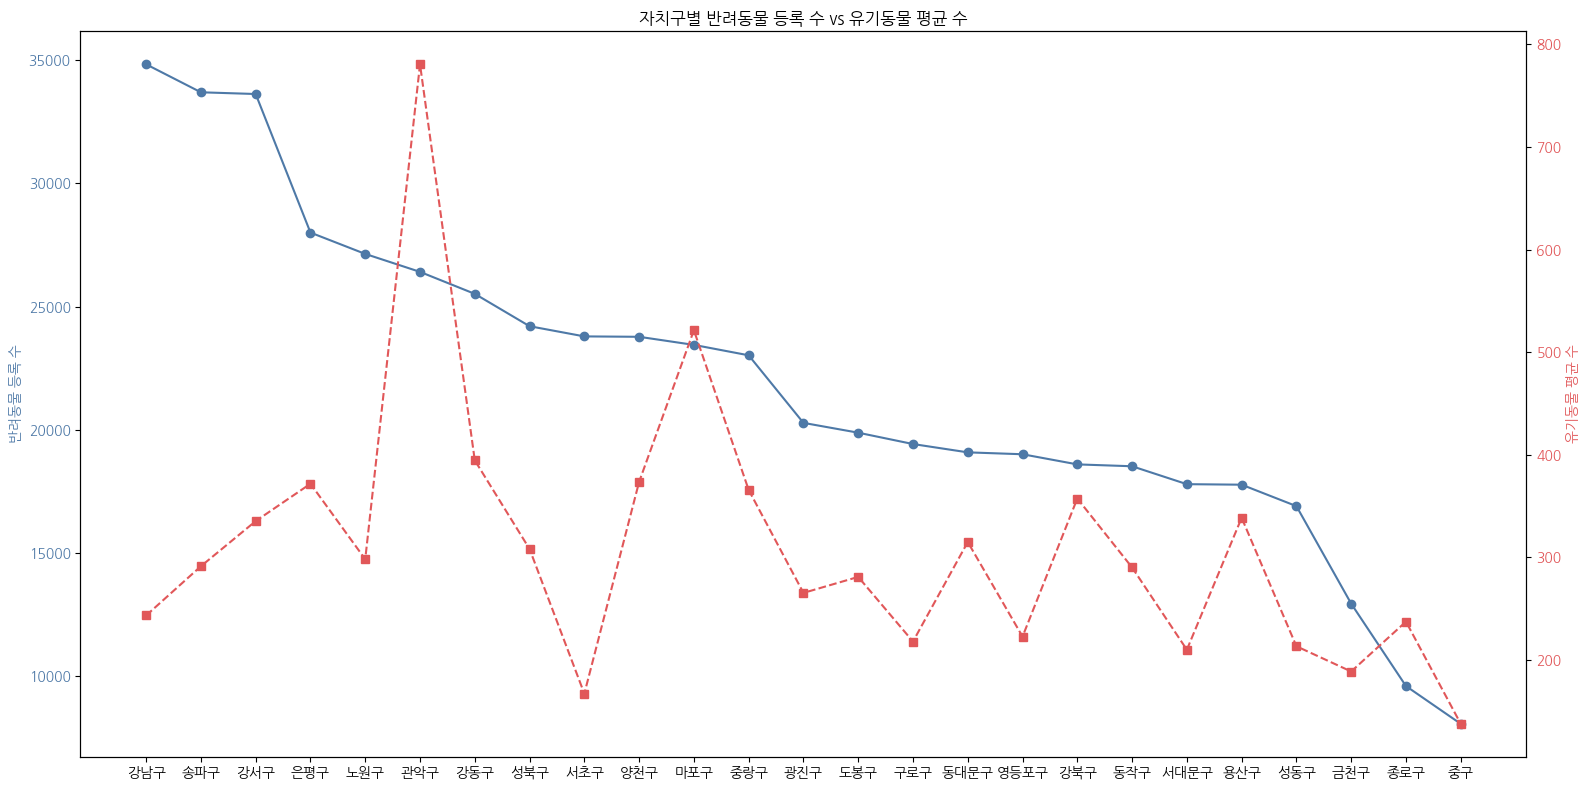

In [5]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

# ▶️ .env 파일의 환경변수 불러오기
load_dotenv("/home/jiming/dev_ws/eda-repo-3/env")
host = os.getenv("DB_HOST")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
database = os.getenv("DB_NAME")

# ▶️ MySQL 연결
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:3306/{database}")

# ▶️ 데이터 조회 (등록현황) ========================================
query = """
SELECT 
    sigungu as 시군구,
    total_registered as 총등록_누계
FROM companion_animal_registration
WHERE sido = '서울특별시'
ORDER BY total_registered DESC
"""
df_register = pd.read_sql(query, engine)

df_register.columns = ['시군구','총등록_누계']




# ▶️ 유기동물 마리수 가져오기 =======================================
query = """
SELECT *
FROM seoul_abandonment_statistics
ORDER BY district_name
"""
df = pd.read_sql(query, engine)
df.columns =['id','자치구', '2016', '2017', '2018', '2019', '2020', '삭제']

# 필요없는 column 제거하기
df = df.drop(columns =['id', '삭제'])

# 평균값 구하기
df['평균'] = df[['2016', '2017', '2018', '2019', '2020']].mean(axis=1)

# 필요없는 column 제거하기
df = df.drop(columns =['2016', '2017','2018','2019','2020'])

df_sorted = df.sort_values(by='평균', ascending=False)



# 두개 데이터 병합하기 =============================================
df_register = df_register.rename(columns={'시군구':'자치구'})
df_merged = pd.merge(df_register, df_sorted, on='자치구', how='inner')
df_merged.columns=['자치구', '반려동물_등록수', '유기동물_평균']



# 두개 병합하기 (scale 다르게) ================================
df_merged_sorted = df_merged.sort_values(by='반려동물_등록수', ascending=False)

plt.figure(figsize=(16, 8))

# 첫 번째 y축
ax1 = plt.gca()
ax1.plot(df_merged_sorted['자치구'], df_merged_sorted['반려동물_등록수'],color='#4e79a7', marker='o', label='반려동물 등록 수')
ax1.set_ylabel('반려동물 등록 수', color='#4e79a7')
ax1.tick_params(axis='y', labelcolor='#4e79a7')

# 두 번째 y축
ax2 = ax1.twinx()
ax2.plot(df_merged_sorted['자치구'], df_merged_sorted['유기동물_평균'], color='#e15759',marker='s', linestyle='--', label='유기동물 평균 수')
ax2.set_ylabel('유기동물 평균 수', color='#e15759')
ax2.tick_params(axis='y', labelcolor='#e15759')

# 공통 x축
plt.xticks(rotation=45)
plt.title('자치구별 반려동물 등록 수 vs 유기동물 평균 수')
plt.tight_layout()

plt.show()




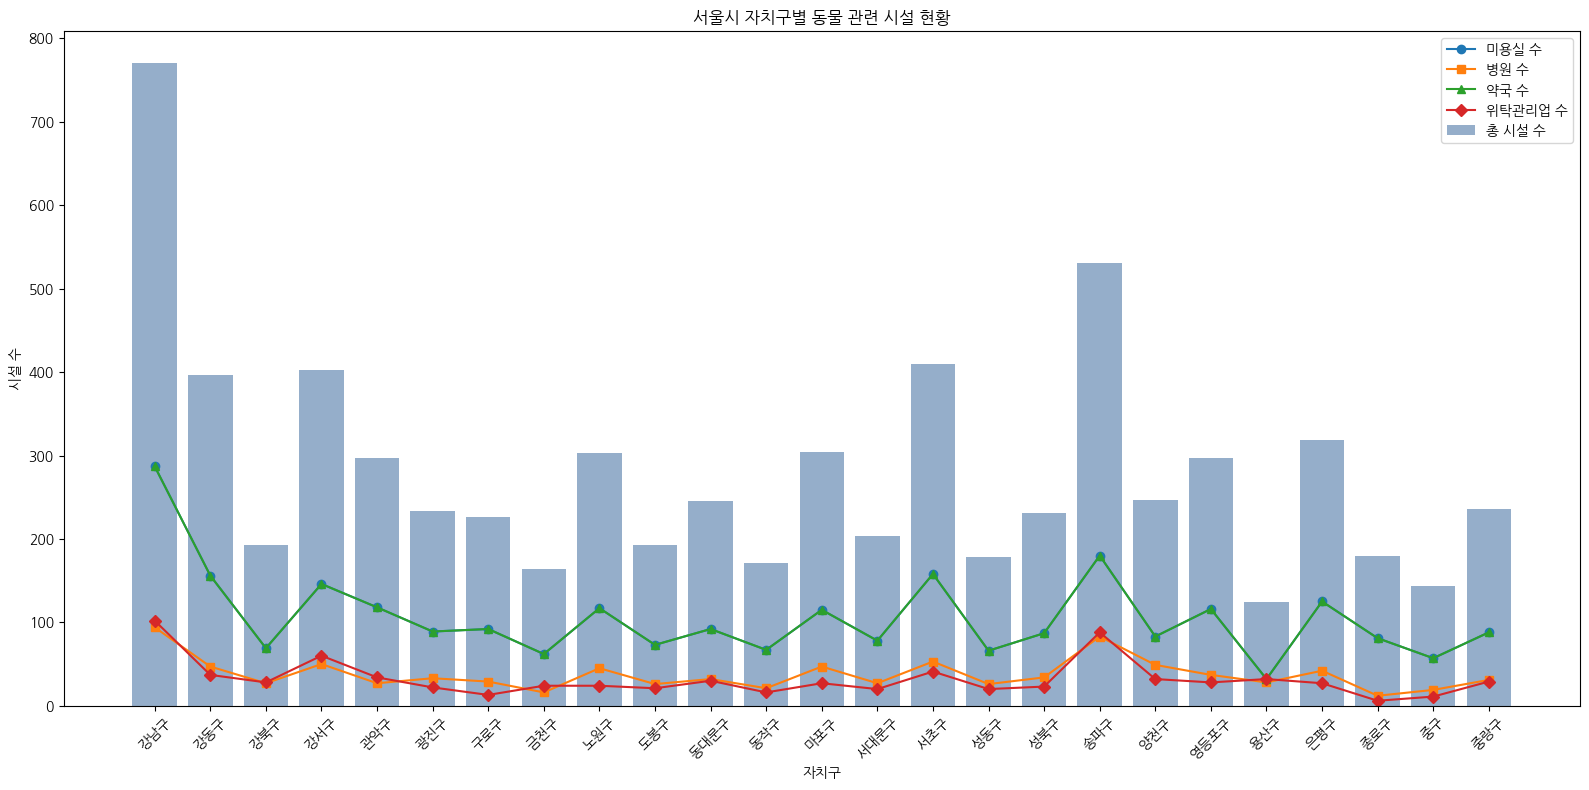

In [6]:
# ===========================================

# 과연 반려동물 업장은 몰려있을까 AND 반려동물 등록수가 높은가

# ===========================================


import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

# ▶️ .env 파일의 환경변수 불러오기
load_dotenv("/home/jiming/dev_ws/eda-repo-3/env")
host = os.getenv("DB_HOST")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
database = os.getenv("DB_NAME")

# ▶️ MySQL 연결
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:3306/{database}")


# ▶️ 미용실 ========================================
query = """
SELECT *
FROM animal_pharmacy_registry
WHERE (status_name LIKE '영업/정상') AND (jibun_address LIKE '서울특별시%%')
"""
df = pd.read_sql(query, engine)

# 구 이름 추출 방법 1: 문자열 분할
df['district'] = df['jibun_address'].str.split(' ').str[2]

# 구 이름 추출 방법 2: 정규표현식 사용
import re
df['district'] = df['jibun_address'].str.extract(r'서울특별시 ([가-힣]+구)')

# 구별 개수 집계
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'beauty_count']
district_counts = district_counts.sort_values('beauty_count', ascending=False)

df_beauty = district_counts



# ▶️ 병원 =======================================
query = """
SELECT jibun_address
FROM animal_hospital_registry
WHERE (status_name LIKE '영업/정상') AND (jibun_address LIKE '서울특별시%%')
"""
df = pd.read_sql(query, engine)

# 구 이름 추출 방법 1: 문자열 분할
df['district'] = df['jibun_address'].str.split(' ').str[2]

# 구 이름 추출 방법 2: 정규표현식 사용
import re
df['district'] = df['jibun_address'].str.extract(r'서울특별시 ([가-힣]+구)')

# 구별 개수 집계
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'hospital_count']
district_counts = district_counts.sort_values('hospital_count', ascending=False)

df_hospital = district_counts

# ▶️ 약국 =======================================
query = """
SELECT *
FROM animal_pharmacy_registry
WHERE (status_name LIKE '영업/정상') AND (jibun_address LIKE '서울특별시%%')
"""
df = pd.read_sql(query, engine)

# 구 이름 추출 방법 1: 문자열 분할
df['district'] = df['jibun_address'].str.split(' ').str[2]

# 구 이름 추출 방법 2: 정규표현식 사용
import re
df['district'] = df['jibun_address'].str.extract(r'서울특별시 ([가-힣]+구)')

# 구별 개수 집계
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'pharmacy_count']
district_counts = district_counts.sort_values('pharmacy_count', ascending=False)

df_pharmacy = district_counts


# ▶️ 위탁관리업 =======================================
query = """
SELECT *
FROM seoul_animal_trust_facility
WHERE (status_name LIKE '영업/정상') AND (jibun_address LIKE '서울특별시%%')
"""
df = pd.read_sql(query, engine)

# 구 이름 추출 방법 1: 문자열 분할
df['district'] = df['jibun_address'].str.split(' ').str[2]

# 구 이름 추출 방법 2: 정규표현식 사용
import re
df['district'] = df['jibun_address'].str.extract(r'서울특별시 ([가-힣]+구)')

# 구별 개수 집계
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'animal_trust_count']
district_counts = district_counts.sort_values('animal_trust_count', ascending=False)


df_hotel = district_counts


# 데이터 병합하기 =============================================
df_merged = pd.merge(df_beauty, df_hospital,  on='district', how='inner')
df_merged = pd.merge(df_merged,df_pharmacy, on='district', how='inner')
df_merged = pd.merge(df_merged, df_hotel, on='district', how='inner')

df_merged_sorted = df_merged.sort_values(by='district', ascending=True)
df_merged_sorted['total_facilities'] = df_merged_sorted[['beauty_count', 'hospital_count', 'pharmacy_count', 'animal_trust_count']].sum(axis=1)



#시각화 ================================================

plt.figure(figsize=(16,8))

x = df_merged_sorted['district']

# 막대그래프 (total_facilities)
plt.bar(x, df_merged_sorted['total_facilities'], color='#4e79a7', alpha=0.6, label='총 시설 수')

# 꺾은선 그래프 (미용실, 병원, 약국, 위탁관리업)
plt.plot(x, df_merged_sorted['beauty_count'], marker='o', label='미용실 수')
plt.plot(x, df_merged_sorted['hospital_count'], marker='s', label='병원 수')
plt.plot(x, df_merged_sorted['pharmacy_count'], marker='^', label='약국 수')
plt.plot(x, df_merged_sorted['animal_trust_count'], marker='D', label='위탁관리업 수')

plt.xticks(rotation=45)
plt.xlabel('자치구')
plt.ylabel('시설 수')
plt.title('서울시 자치구별 동물 관련 시설 현황')

plt.legend()
plt.tight_layout()
plt.show()






# # 첫 번째 y축
# ax1 = plt.gca()
# line1, = ax1.plot(df_merged_sorted['자치구'], df_merged_sorted['반려동물_등록수'],color='#4e79a7', marker='o', label='반려동물 등록 수')
# ax1.set_ylabel('반려동물 등록 수', color='#4e79a7')
# ax1.tick_params(axis='y', labelcolor='#4e79a7')

# # 두 번째 y축
# ax2 = ax1.twinx()
# line2, = ax2.plot(df_merged_sorted['자치구'], df_merged_sorted['유기동물_평균'], color='#e15759',marker='s', linestyle='--', label='유기동물 평균 수')
# ax2.set_ylabel('유기동물 평균 수', color='#e15759')
# ax2.tick_params(axis='y', labelcolor='#e15759')

# # 공통 x축
# plt.xticks(rotation=45)
# plt.title('자치구별 반려동물 등록 수 vs 유기동물 평균 수')
# plt.tight_layout()


# lines = [line1, line2]
# labels = [line.get_label() for line in lines]
# ax1.legend(lines, labels, loc='upper right')


# # ▶️ 이미지 저장 경로 지정
# output_path = 'RESULT/visualization/반려동물등록수_AND_유기동물수_꺾은선그래프.png'
# # os.makedirs(os.path.dirname(output_path), exist_ok=True)  # 폴더가 없으면 생성
# plt.savefig(output_path, dpi=300, bbox_inches='tight')  # 고해상도 저장

# plt.show()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import folium
from sqlalchemy import create_engine
from shapely.geometry import shape
from io import BytesIO
import base64

from dotenv import load_dotenv
import os
import json

# .env 파일을 찾아 환경 변수로 로드
load_dotenv()

# 환경 변수 가져오기
host = os.getenv("DB_HOST")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
database = os.getenv("DB_NAME")

# ▶️ MySQL 연결
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:3306/{database}")



# ▶️ 서울 동물약국 수 정보 가져오기
  # 영업/정상 : 필터링
  # 서울특별시 : 지역으로 필터링
  
query = """
SELECT *
FROM animal_pharmacy_registry
WHERE (status_name LIKE '영업/정상') AND (jibun_address LIKE '서울특별시%%')
"""
df = pd.read_sql(query, engine)

# 구 이름 추출 방법 1: 문자열 분할
df['district'] = df['jibun_address'].str.split(' ').str[2]

# 구 이름 추출 방법 2: 정규표현식 사용
import re
df['district'] = df['jibun_address'].str.extract(r'서울특별시 ([가-힣]+구)')

# 구별 개수 집계
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'pharmacy_count']
district_counts = district_counts.sort_values('pharmacy_count', ascending=False)

print(district_counts)
# # ▶️ 시각화 (자치구별 연도별 유기견 발생 추이)
# plt.figure(figsize=(14, 8))
# plt.bar(district_counts['district'], district_counts['pharmacy_count'])
# plt.title("✅ 자치구별 동물약국 현황 2024", fontsize=16)
# plt.xlabel("자치구(서울)")
# plt.ylabel("동물약국 수")
# plt.grid(True, linestyle='--', alpha=0.6)
# # plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
# # plt.tight_layout()
# # plt.show()

# plt.savefig("RESULT/visualization/행정안전부_서울시_동물약국수_막대그래프.png")


   district  pharmacy_count
0       강남구             287
1       송파구             180
2       서초구             158
3       강동구             156
4       강서구             146
5       은평구             125
6       관악구             118
7       노원구             117
8      영등포구             116
9       마포구             115
10      구로구              92
11     동대문구              92
12      광진구              89
13      중랑구              88
14      성북구              87
15      양천구              83
16      종로구              81
17     서대문구              78
18      도봉구              73
19      강북구              69
20      동작구              67
21      성동구              66
22      금천구              62
23       중구              57
24      용산구              32


In [8]:
query = """
SELECT *
FROM animal_pharmacy_registry
WHERE (status_name LIKE '영업/정상') AND (jibun_address LIKE '서울특별시%%')
"""
df = pd.read_sql(query, engine)

# 구 이름 추출 방법 1: 문자열 분할
df['district'] = df['jibun_address'].str.split(' ').str[2]

# 구 이름 추출 방법 2: 정규표현식 사용
import re
df['district'] = df['jibun_address'].str.extract(r'서울특별시 ([가-힣]+구)')

# 구별 개수 집계
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'beauty_count']
district_counts = district_counts.sort_values('beauty_count', ascending=False)

print(district_counts)

   district  beauty_count
0       강남구           287
1       송파구           180
2       서초구           158
3       강동구           156
4       강서구           146
5       은평구           125
6       관악구           118
7       노원구           117
8      영등포구           116
9       마포구           115
10      구로구            92
11     동대문구            92
12      광진구            89
13      중랑구            88
14      성북구            87
15      양천구            83
16      종로구            81
17     서대문구            78
18      도봉구            73
19      강북구            69
20      동작구            67
21      성동구            66
22      금천구            62
23       중구            57
24      용산구            32


In [9]:
query = """
SELECT *
FROM animal_pharmacy_registry
WHERE (status_name LIKE '영업/정상') AND (jibun_address LIKE '서울특별시%%')
"""
df = pd.read_sql(query, engine)

# 구 이름 추출 방법 1: 문자열 분할
df['district'] = df['jibun_address'].str.split(' ').str[2]

# 구 이름 추출 방법 2: 정규표현식 사용
import re
df['district'] = df['jibun_address'].str.extract(r'서울특별시 ([가-힣]+구)')

# 구별 개수 집계
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'pharmacy_count']
district_counts = district_counts.sort_values('pharmacy_count', ascending=False)

print(district_counts)

   district  pharmacy_count
0       강남구             287
1       송파구             180
2       서초구             158
3       강동구             156
4       강서구             146
5       은평구             125
6       관악구             118
7       노원구             117
8      영등포구             116
9       마포구             115
10      구로구              92
11     동대문구              92
12      광진구              89
13      중랑구              88
14      성북구              87
15      양천구              83
16      종로구              81
17     서대문구              78
18      도봉구              73
19      강북구              69
20      동작구              67
21      성동구              66
22      금천구              62
23       중구              57
24      용산구              32
